# VisTool Example Usage

This notebook demonstrates how to use the `VisTool` for data downloading, wrangling, combining and visualization.

## Prerequisites

Make sure the `VisTool` is installed in your environment before proceeding please see READ.ME for how to install VisTool

# Download Module 

1. `download_file`: Downloads a file from a given URL and saves it locally.

2. `download_csv`: Downloads a CSV file from a URL and loads it into a Pandas DataFrame.

3. `load_csv`: Loads a CSV file into a Pandas DataFrame from local path.

4. `load_excel`: Load excel file into a Pandas DataFrame from local path. 

5. `summarize_data`: Summarizes key aspects of the dataset and provides an overview of its structure.

## Combine Module 

1. `merge_datasets`: Merges two datasets on a specified column.

2. `concat_datasets`: Concatenates multiple datasets along rows or columns.

## Visualize Module 
1. `plot_histogram`: Plots a histogram of a column.

2. `plot_scatter`: Creates a scatter plot of two columns.

3. `plot_correlation_matrix`: Plots a heatmap of correlations between numeric columns.

4. `plot_line`: Plots a line chart for time-series data.

5. `plot_overlay`: Overlays multiple columns with different plot types.

## Wrangle Module 
 1. `clean_data`: Cleans the dataset by dropping NaN values or filling with mean.

2. `filter_data`: Filters rows based on a condition.

3. `rename_columns`: Renames columns in the dataset.

4. `label_encode`: Perform label encoding on a categorical column using Pandas and NumPy.

## Checking the package information and if it is installed correctly. 

In [1]:
# this should work!
import VisTool
print(VisTool.__version__)
print(VisTool.__name__)
print(VisTool.__author__)

0.1.0
VisTool
Guled Abdullahi and Kayleigh Haydock 


## Download Module Example Usage 

1. download_file(url: str, save_path: str) -> None

2. download_csv(url: str) -> pd.DataFrame

3. load_csv(file_path: str) -> pd.DataFrame

4. load_excel(file_path: str, sheet_name: str = None) -> pd.DataFrame

5. summarize_data(df)

Summarizes key aspects of the dataset and provides an overview of its structure, including:

	• Shape (rows, columns)

	• Numeric and non-numeric columns

	• Missing values

	• Duplicate rows

	• Categorical columns

	• Correlation matrix for numeric columns


In [2]:
# Import the download functions
from VisTool.download import download_file,download_csv, load_csv,load_excel, summarize_data
import os

# Download a file and save it locally
url = "https://people.sc.fsu.edu/~jburkardt/data/csv/airtravel.csv"
save_path = "data/airtravel.csv"

# Create the directory if it doesn't exist
os.makedirs(os.path.dirname(save_path), exist_ok=True)

# Download the file
download_file(url, save_path)

# Verify the file is saved
if os.path.exists(save_path):
    print(f"File downloaded successfully and saved to: {save_path}")
else:
    print("Failed to download the file.")
  

File downloaded successfully: data/airtravel.csv
File downloaded successfully and saved to: data/airtravel.csv


In [3]:
  

#  Download a CSV file and load into Pandas DataFrame
url = "https://people.sc.fsu.edu/~jburkardt/data/csv/airtravel.csv"
df = download_csv(url)

# Display the first few rows of the DataFrame
print("Downloaded CSV Data:")
print(df.head())


CSV downloaded and loaded into a DataFrame successfully.
Downloaded CSV Data:
  Month   "1958"   "1959"   "1960"
0   JAN      340      360      417
1   FEB      318      342      391
2   MAR      362      406      419
3   APR      348      396      461
4   MAY      363      420      472


In [4]:
# load csv file 

df = load_csv('data/Monthly_AE_Attendances_Nov_2024.csv')
df.head(5)

File 'data/Monthly_AE_Attendances_Nov_2024.csv' loaded successfully!


,period,org_code,parent_org,org_name,ae_attendances_type_1,ae_attendances_type_2,ae_attendances_other_ae_department,ae_attendances_booked_appointments_type_1,ae_attendances_booked_appointments_type_2,ae_attendances_booked_appointments_other_department,...,attendances_over_4hrs_other_department,attendances_over_4hrs_booked_appointments_type_1,attendances_over_4hrs_booked_appointments_type_2,attendances_over_4hrs_booked_appointments_other_department,patients_who_have_waited_4-12_hs_from_dta_to_admission,patients_who_have_waited_12+_hrs_from_dta_to_admission,emergency_admissions_via_ae-type_1,emergency_admissions_via_ae-type_2,emergency_admissions_via_ae-other_AE_department,other_emergency_admissions
0,MSitAE-NOVEMBER-2024,NL7,NHS ENGLAND MIDLANDS,ASSURA VERTIS URGENT CARE CENTRES (BIRMINGHAM),0,0,4350,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,MSitAE-NOVEMBER-2024,RWY,NHS ENGLAND NORTH EAST AND YORKSHIRE,CALDERDALE AND HUDDERSFIELD NHS FOUNDATION TRUST,15295,0,0,0,0,0,...,0,0,0,0,1160,16,3104,0,0,316
2,MSitAE-NOVEMBER-2024,AAH,NHS ENGLAND SOUTH WEST,TETBURY HOSPITAL TRUST LTD,0,0,516,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,MSitAE-NOVEMBER-2024,AQN04,NHS ENGLAND SOUTH EAST,PHL LYMINGTON UTC,0,0,2593,0,0,12,...,1,0,0,0,0,0,0,0,0,0
4,MSitAE-NOVEMBER-2024,C82038,NHS ENGLAND MIDLANDS,LATHAM HOUSE MEDICAL PRACTICE,0,0,303,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# Load_excel file 
df_dict = load_excel('data/titanic3.xls')
print(type(df_dict))  # Output: <class 'dict'>
print(df_dict.keys())  # Output: dict_keys(['Sheet1', 'Sheet2', ...])

File 'data/titanic3.xls' loaded successfully!
<class 'dict'>
dict_keys(['titanic3'])


In [6]:
df = df_dict['titanic3']  # Access the DataFrame for the 'titanic3' sheet
print(df.head(5))  # Display the first 5 rows of the DataFrame

   pclass  survived                                             name     sex  \
0       1         1                    Allen, Miss. Elisabeth Walton  female   
1       1         1                   Allison, Master. Hudson Trevor    male   
2       1         0                     Allison, Miss. Helen Loraine  female   
3       1         0             Allison, Mr. Hudson Joshua Creighton    male   
4       1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   

       age  sibsp  parch  ticket      fare    cabin embarked boat   body  \
0  29.0000      0      0   24160  211.3375       B5        S    2    NaN   
1   0.9167      1      2  113781  151.5500  C22 C26        S   11    NaN   
2   2.0000      1      2  113781  151.5500  C22 C26        S  NaN    NaN   
3  30.0000      1      2  113781  151.5500  C22 C26        S  NaN  135.0   
4  25.0000      1      2  113781  151.5500  C22 C26        S  NaN    NaN   

                         home.dest  
0                     St 

In [7]:
## Summary of the data 
df = load_csv('data/Monthly_AE_Attendances_Nov_2024.csv')
summarize_data(df)

File 'data/Monthly_AE_Attendances_Nov_2024.csv' loaded successfully!

    --- Data Overview ---
    Shape: 198 rows, 22 columns

    Numeric Columns: 18 columns (e.g., ae_attendances_type_1, ae_attendances_type_2, ae_attendances_other_ae_department...)
    Non-Numeric Columns: 4 columns (e.g., period, org_code, parent_org...)

    Missing Values: 0 missing values in total
    Duplicate Rows: 0 duplicate rows

    Categorical Columns: 2 columns (e.g., period, parent_org...)

    Correlation between numeric columns:
                                                        ae_attendances_type_1  \
ae_attendances_type_1                                            1.000000   
ae_attendances_type_2                                            0.980878   
ae_attendances_other_ae_department                               0.996996   
ae_attendances_booked_appointments_type_1                        0.985124   
ae_attendances_booked_appointments_type_2                        0.793002   
ae_attendances

## Combine Module Example Usage

The combine.py module allows for merging and concatenating datasets, making it easier to integrate and manage data. Below is a detailed explanation of the features along with examples.

1.`merge_datasets(left_df, right_df, on, how)`

This function merges two datasets on a specified column using various join methods (inner, outer, left, right).

Arguments:

• `left_df (pd.DataFrame)`: The first dataset.

• `right_df (pd.DataFrame)`: The second dataset.

• `on (str)`: The column to merge on.

• `how (str, optional)`: Type of join ("inner", "outer", "left", "right"). Default: "inner".

2.`concat_datasets(dataframes, axis)`

This function concatenates multiple datasets either row-wise or column-wise.

Arguments:

• `dataframes (list[pd.DataFrame])`: List of datasets to concatenate.

• `axis (int, optional)`: Axis to concatenate on (0 for rows, 1 for columns). Default: 0.    

In [8]:


#Example 1: Inner Join

from VisTool.combine import merge_datasets, concat_datasets
import pandas as pd

# Sample data
data1 = {'id': [1, 2, 3], 'name': ['Alice', 'Bob', 'Charlie']}
data2 = {'id': [2, 3, 4], 'age': [25, 30, 35]}

df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)

# Merge datasets inner joint 
merged_data = merge_datasets(df1, df2, on="id", how="inner")
print(merged_data)



Datasets merged successfully using inner join.
   id     name  age
0   2      Bob   25
1   3  Charlie   30


In [9]:

# Merge datasets inner joint 

merged_data = merge_datasets(df1, df2, on="id", how="outer")
print(merged_data)

Datasets merged successfully using outer join.
   id     name   age
0   1    Alice   NaN
1   2      Bob  25.0
2   3  Charlie  30.0
3   4      NaN  35.0


In [10]:
#Concatenating Row-Wise

# Sample data
df1 = pd.DataFrame({'id': [1, 2], 'name': ['Alice', 'Bob']})
df2 = pd.DataFrame({'id': [3, 4], 'name': ['Charlie', 'David']})

# Concatenate row-wise
concatenated_data = concat_datasets([df1, df2], axis=0)
print(concatenated_data)


Datasets concatenated successfully along axis 0.
   id     name
0   1    Alice
1   2      Bob
0   3  Charlie
1   4    David


In [11]:

# Concatenate column-wise
concatenated_data = concat_datasets([df1, df2], axis=1)
print(concatenated_data)

Datasets concatenated successfully along axis 1.
   id   name  id     name
0   1  Alice   3  Charlie
1   2    Bob   4    David


## Wrangle Module Example Usage

The wrangle module simplifies the process of preparing and managing datasets by offering both manual and interactive options for cleaning, filtering, renaming, and encoding data. The interactive functions allow users to manipulate their data directly in Jupyter Notebooks without writing additional code.

`1. clean_data(data, remove_columns=None, fill_with=None, apply_to='columns')`

This function cleans the dataset by dropping or filling missing values.

Arguments:

• data (pd.DataFrame): The input dataset.

• remove_columns (list, optional): List of columns to drop rows with missing values.

• fill_with (str, optional): Method to fill NaN values ('mean' or 'average').

• apply_to (str, optional): Apply the operation to 'columns' or 'rows'. Default: 'columns'.


`2. filter_data(data, condition)`

Filters the dataset based on a specified condition.

Arguments:
• data (pd.DataFrame): The input dataset.

• condition (str): A valid pandas query string to filter the data.


`3. rename_columns(data, columns_mapping)`

Renames columns using a dictionary mapping.

Arguments:

• data (pd.DataFrame): The input dataset.

• columns_mapping (dict): A mapping of old column names to new names.

`4. label_encode(data, column)`

Applies label encoding to a categorical column.

Arguments:
• data (pd.DataFrame): The dataset containing the categorical column.

• column (str): The name of the column to encode.



`Interactive Variants`

1. clean_data_interactive(data): Interactive version of clean_data.

2. filter_data_interactive(data): Interactive version of filter_data.

3. rename_columns_interactive(data): Interactive column renaming.

4. label_encode_interactive(data): Interactive label encoding.



In [12]:
# Import wrangle module functions
from VisTool.wrangle import clean_data, filter_data, rename_columns, label_encode
import pandas as pd

# a customer dataset
data = pd.DataFrame({
    'Customer_ID': [101, 102, 103, 104, None, 106, 107, 108],
    'Age': [25, 30, 35, None, 40, None, 45, 50],
    'Gender': ['Male', 'Female', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male'],
    'Annual_Income': [50000, None, 70000, 80000, 60000, 90000, None, 100000],
    'Purchase_History': [3, 5, None, 7, 8, 9, 6, 2],
    'City': ['NY', 'LA', 'SF', 'LA', 'NY', 'SF', 'LA', 'NY'],
    'Customer_Type': ['Regular', 'VIP', 'Regular', 'VIP', 'Regular', 'Regular', 'VIP', 'Regular']
})

data


,Customer_ID,Age,Gender,Annual_Income,Purchase_History,City,Customer_Type
0,101.0,25.0,Male,50000.0,3.0,NY,Regular
1,102.0,30.0,Female,NaN,5.0,LA,VIP
2,103.0,35.0,Female,70000.0,NaN,SF,Regular
3,104.0,NaN,Male,80000.0,7.0,LA,VIP
4,NaN,40.0,Female,60000.0,8.0,NY,Regular
5,106.0,NaN,Male,90000.0,9.0,SF,Regular
6,107.0,45.0,Female,NaN,6.0,LA,VIP
7,108.0,50.0,Male,100000.0,2.0,NY,Regular


In [13]:

# Step 1: Clean the data
# - Remove rows where 'Customer_ID' or 'Annual_Income' is missing
# - Fill missing values in 'Age' and 'Purchase_History' with the mean of each column

cleaned_data = clean_data(data, remove_columns=['Customer_ID', 'Annual_Income'], fill_with='mean', apply_to='columns')

cleaned_data


Rows with NaN in columns ['Customer_ID', 'Annual_Income'] were dropped.


,Customer_ID,Age,Gender,Annual_Income,Purchase_History,City,Customer_Type
0,101.0,25.0,Male,50000.0,3.0,NY,Regular
1,103.0,35.0,Female,70000.0,NaN,SF,Regular
2,104.0,NaN,Male,80000.0,7.0,LA,VIP
3,106.0,NaN,Male,90000.0,9.0,SF,Regular
4,108.0,50.0,Male,100000.0,2.0,NY,Regular


In [14]:


# Step 2: Filter the data
# - Only include customers aged over 30 who have made more than 5 purchases

filtered_data = filter_data(data, "Age > 30 and Purchase_History > 5")

filtered_data


Data filtered successfully.


,Customer_ID,Age,Gender,Annual_Income,Purchase_History,City,Customer_Type
4,NaN,40.0,Female,60000.0,8.0,NY,Regular
6,107.0,45.0,Female,NaN,6.0,LA,VIP


In [15]:


# Step 3: Rename columns
# - Rename 'Customer_Type' to 'Customer_Category' and 'Purchase_History' to 'Purchases_Made'

renamed_data = rename_columns(data, {'Customer_Type': 'Customer_Category', 'Purchase_History': 'Purchases_Made'})
renamed_data


Columns renamed successfully.


,Customer_ID,Age,Gender,Annual_Income,Purchases_Made,City,Customer_Category
0,101.0,25.0,Male,50000.0,3.0,NY,Regular
1,102.0,30.0,Female,NaN,5.0,LA,VIP
2,103.0,35.0,Female,70000.0,NaN,SF,Regular
3,104.0,NaN,Male,80000.0,7.0,LA,VIP
4,NaN,40.0,Female,60000.0,8.0,NY,Regular
5,106.0,NaN,Male,90000.0,9.0,SF,Regular
6,107.0,45.0,Female,NaN,6.0,LA,VIP
7,108.0,50.0,Male,100000.0,2.0,NY,Regular


In [16]:


# Step 4: Label encode the 'Gender' and 'Customer_Type' columns
# - Convert 'Gender' (Male/Female) to 0/1 and 'Customer_Type' (Regular/VIP) to 0/1

encoded_data = label_encode(data, 'Gender')
encoded_data = label_encode(data, 'Customer_Type')

# Display the final wrangled dataset
print("Final Data After Wrangling:")
encoded_data



Label encoding applied to column: Gender
Label encoding applied to column: Customer_Type
Final Data After Wrangling:


,Customer_ID,Age,Gender,Annual_Income,Purchase_History,City,Customer_Type
0,101.0,25.0,1,50000.0,3.0,NY,0
1,102.0,30.0,0,NaN,5.0,LA,1
2,103.0,35.0,0,70000.0,NaN,SF,0
3,104.0,NaN,1,80000.0,7.0,LA,1
4,NaN,40.0,0,60000.0,8.0,NY,0
5,106.0,NaN,1,90000.0,9.0,SF,0
6,107.0,45.0,0,NaN,6.0,LA,1
7,108.0,50.0,1,100000.0,2.0,NY,0


### Interactive Variants

In [17]:
import pandas as pd
from VisTool.wrangle import (
    clean_data_interactive,
    filter_data_interactive,
    rename_columns_interactive,
    label_encode_interactive
)





### 1. Clean the dataset interactively

clean_data_interactive(data)

How to use:
• Select columns to remove using the Remove Columns dropdown.

• Choose “mean” or “average” to fill NaN values in numeric columns.

• Specify whether to apply changes to columns or rows using the Apply To dropdown.

• Click Apply Cleaning to see the updated dataset.


In [18]:
# Step 1: Clean the data
# - Remove rows where 'Customer_ID' or 'Annual_Income' is missing
# - Fill missing values in 'Age' and 'Purchase_History' with the mean of each column

clean_data_interactive(data)

SelectMultiple(description='Remove Columns:', options=('Customer_ID', 'Age', 'Gender', 'Annual_Income', 'Purch…

Dropdown(description='Fill With:', options=('None', 'mean', 'average'), value='None')

Dropdown(description='Apply To:', options=('columns', 'rows'), value='columns')

Button(description='Apply Cleaning', style=ButtonStyle())


### 2. Filter the dataset interactively

filter_data_interactive(data)

How to use:

• Enter a condition to filter rows in the Condition text box (e.g., Age > 30 or Gender == 'Female').

• Click Apply Filter to view the filtered dataset.


In [19]:
# Step 2: Filter the data
# - Only include customers aged over 30 who have made more than 5 purchases
# Age > 30 and Purchase_History > 5
filter_data_interactive(data)

Text(value='', description='Condition:', placeholder='Enter condition (e.g., Age > 30)')

Button(description='Apply Filter', style=ButtonStyle())


### 3. Rename columns interactively

rename_columns_interactive(data)

How to use:

• Enter mappings for column renaming in the format old_name:new_name (e.g., Name:Full_Name,Score:Test_Score).

• Click Apply Rename to see the dataset with renamed columns.


In [20]:

# Step 3: Rename columns
# - Rename 'Customer_Type' to 'Customer_Category' and 'Purchase_History' to 'Purchases_Made'

rename_mapping = {'Customer_Type': 'Customer_Category', 
                'Purchase_History': 'Purchase_Made'}

rename_columns_interactive(data)

Text(value='', description='Mappings:', placeholder='Enter mappings (e.g., old:new,age:years)')

Button(description='Apply Rename', style=ButtonStyle())


### 4. Apply label encoding interactively

label_encode_interactive(data)

How to use:

• Select a categorical column (e.g., Gender) from the Column dropdown.

• Click Apply Encoding to view the dataset with the selected column label-encoded.


In [21]:
label_encode_interactive(data)

Dropdown(description='Column:', options=('Customer_ID', 'Age', 'Gender', 'Annual_Income', 'Purchase_History', …

Button(description='Apply Encoding', style=ButtonStyle())

## Visualize Module Example Usage

The visualize. module provides powerful and easy-to-use tools for creating data visualizations.  this module simplifies exploratory data analysis and presentation.


`1. plot_histogram(data, column, bins=10, save_path=None)`

Plots a histogram for a specified column to visualize its distribution.

Arguments:

•	data (pd.DataFrame): Input dataset.

•	column (str): Column to visualize.

•	bins (int, optional): Number of bins in the histogram (default: 10).

•	save_path (str, optional): Path to save the plot (default: None).



`2. plot_scatter(data, x_column, y_column, save_path=None)`

Creates a scatter plot to explore the relationship between two columns.

Arguments:

• data (pd.DataFrame): Input dataset.

• x_column (str): Column for the x-axis.

• y_column (str): Column for the y-axis.

• save_path (str, optional): Path to save the plot (default: None).



`3. plot_correlation_matrix(data, save_path=None)`

Generates a heatmap to visualize correlations between numeric columns.

Arguments:

• data (pd.DataFrame): Input dataset.

• save_path (str, optional): Path to save the heatmap (default: None).


`4. plot_line(data, x_column, y_column, save_path=None)`

Creates a line chart, ideal for time-series or sequential data.

Arguments:

• data (pd.DataFrame): Input dataset.

• x_column (str): Column for the x-axis (e.g., time or sequence).

• y_column (str): Column for the y-axis.

• save_path (str, optional): Path to save the plot (default: None).



`5. plot_overlay(data, columns, plot_types, save_path=None)`

Overlays multiple columns using different plot types (e.g., line, bar).

Arguments:

• data (pd.DataFrame): Input dataset.

• columns (list): Columns to plot.

• plot_types (list): List of plot types for each column ('line', 'scatter', etc.).

• save_path (str, optional): Path to save the plot (default: None).


In [24]:
# Import visualize module functions
import pandas as pd 
from VisTool.visualize import plot_histogram, plot_scatter, plot_correlation_matrix, plot_line, plot_overlay


# Sample DataFrame
data = pd.DataFrame({
    'Age': [25, 30, 35, 40, 45],
    'Salary': [3000, 3500, 4000, 4500, 5000],
    'Date': pd.date_range(start='2022-01-01', periods=5),
    'Profit': [500, 600, 700, 800, 900]
})


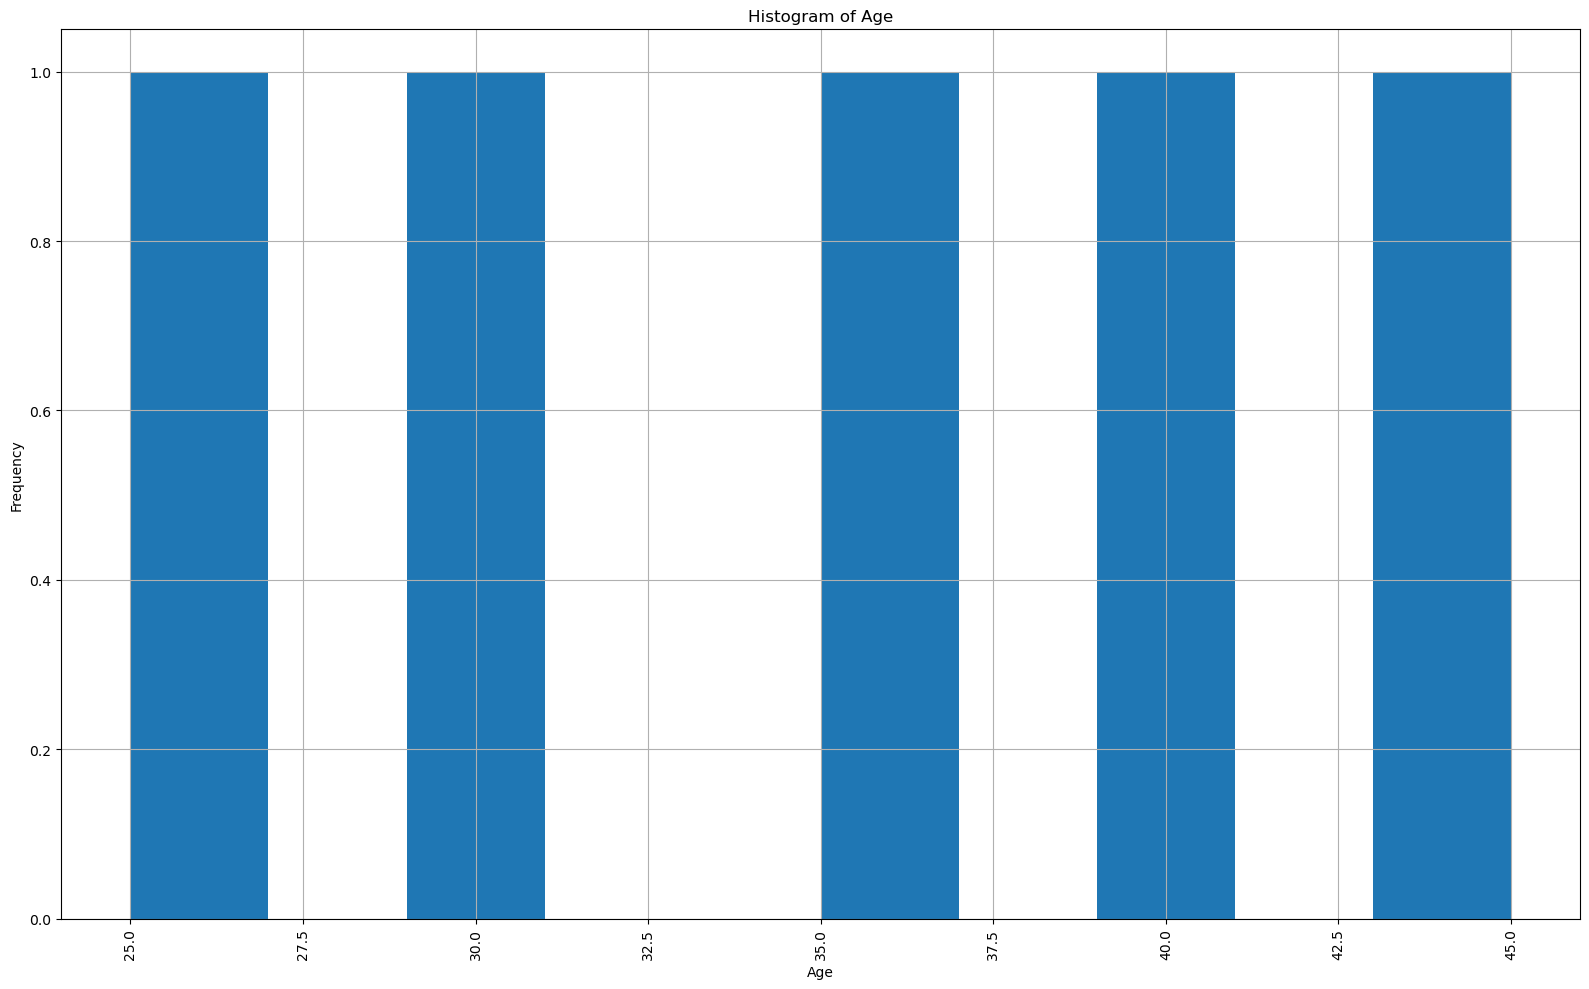

In [26]:

# Plot histogram
plot_histogram(data, column='Age')


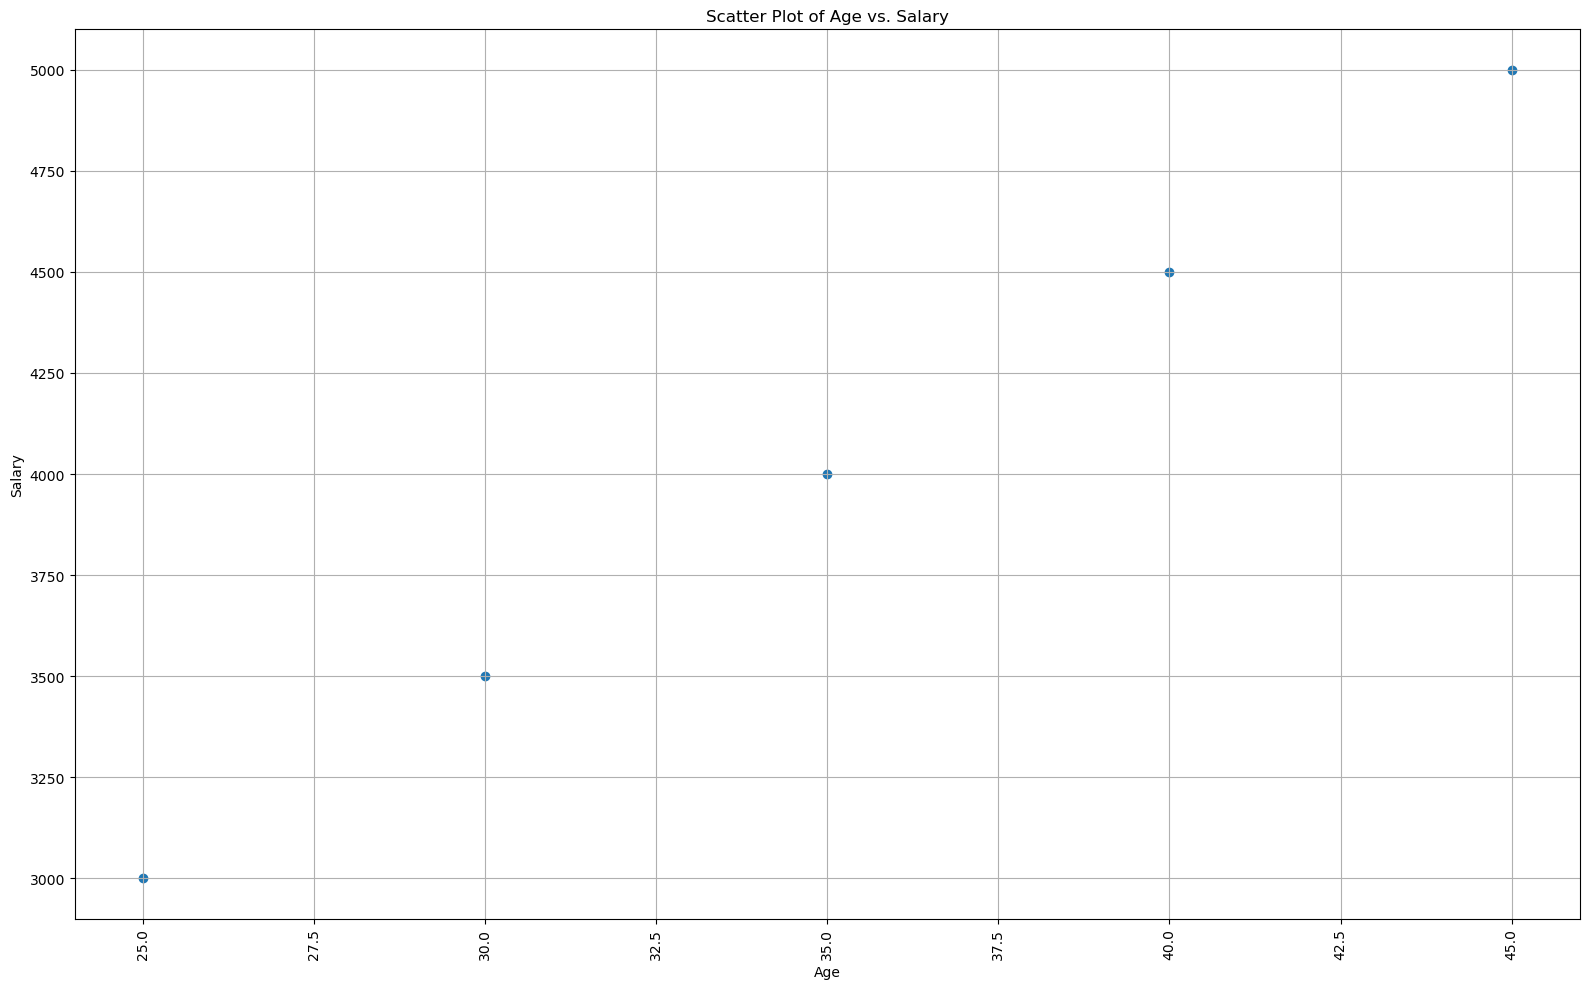

In [27]:


# Plot scatter
plot_scatter(data, x_column='Age', y_column='Salary')


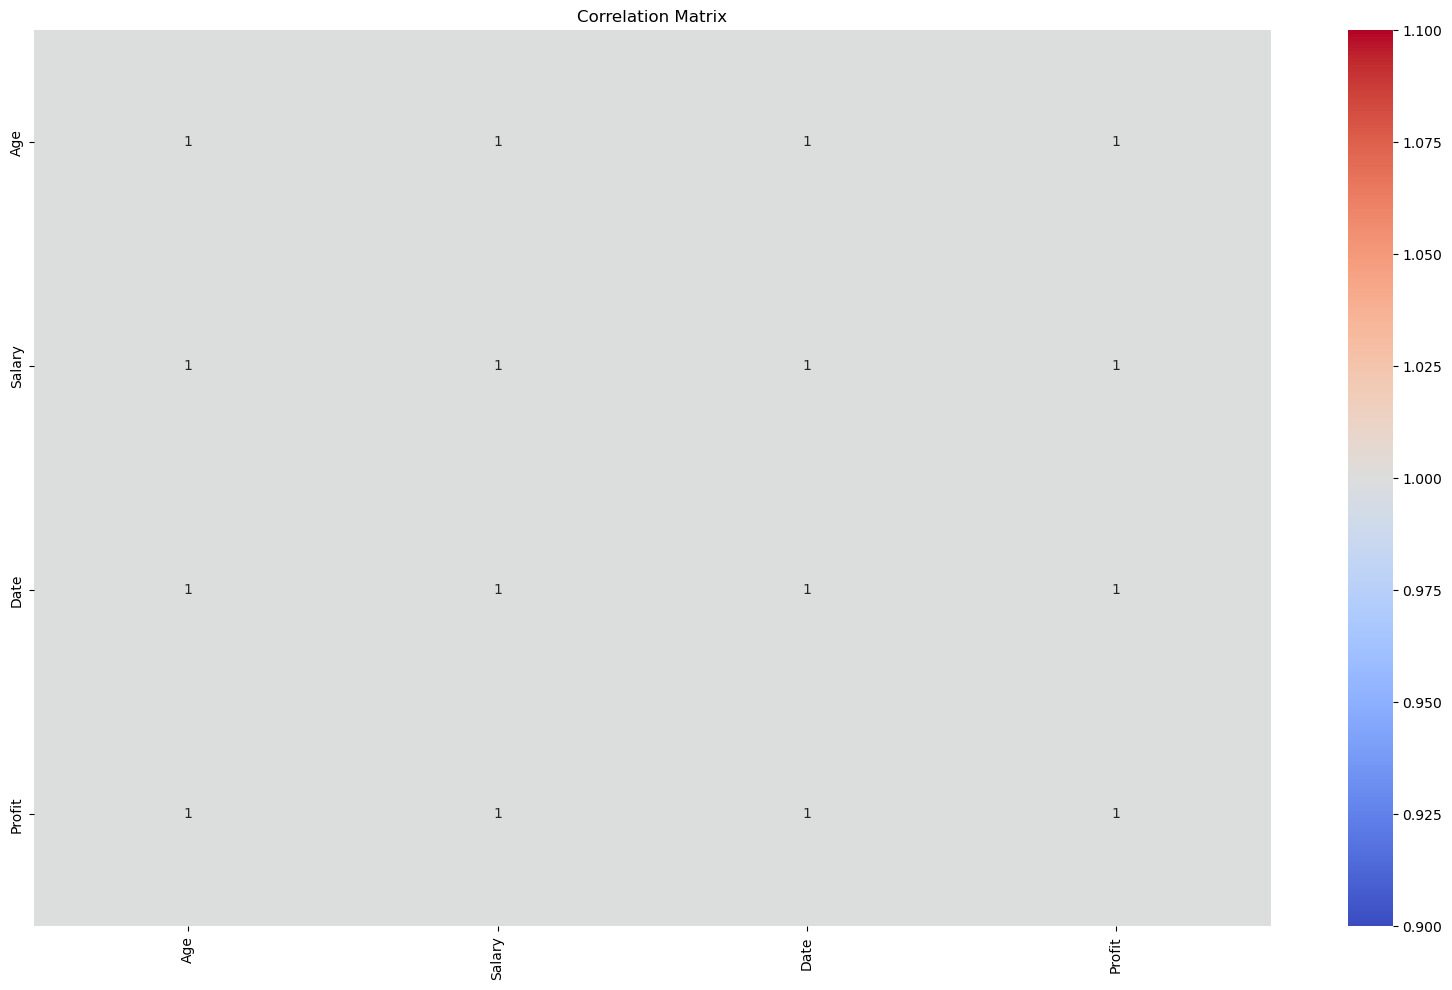

In [28]:

# Plot correlation matrix
plot_correlation_matrix(data)


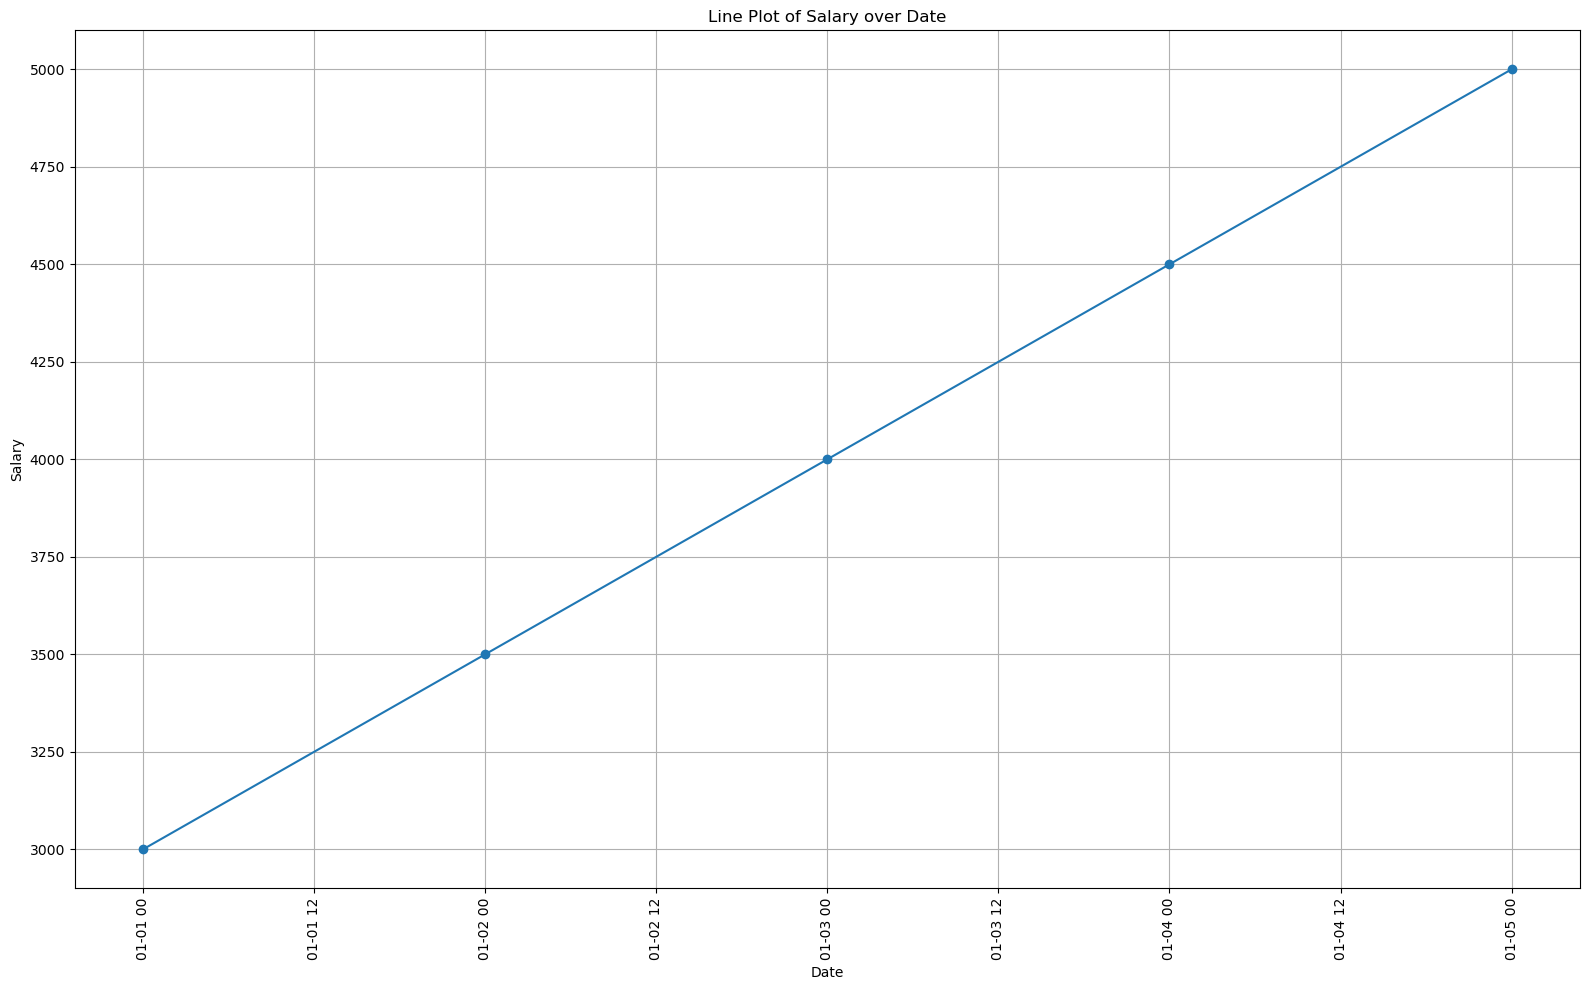

In [29]:

# Plot line chart
plot_line(data, x_column='Date', y_column='Salary')


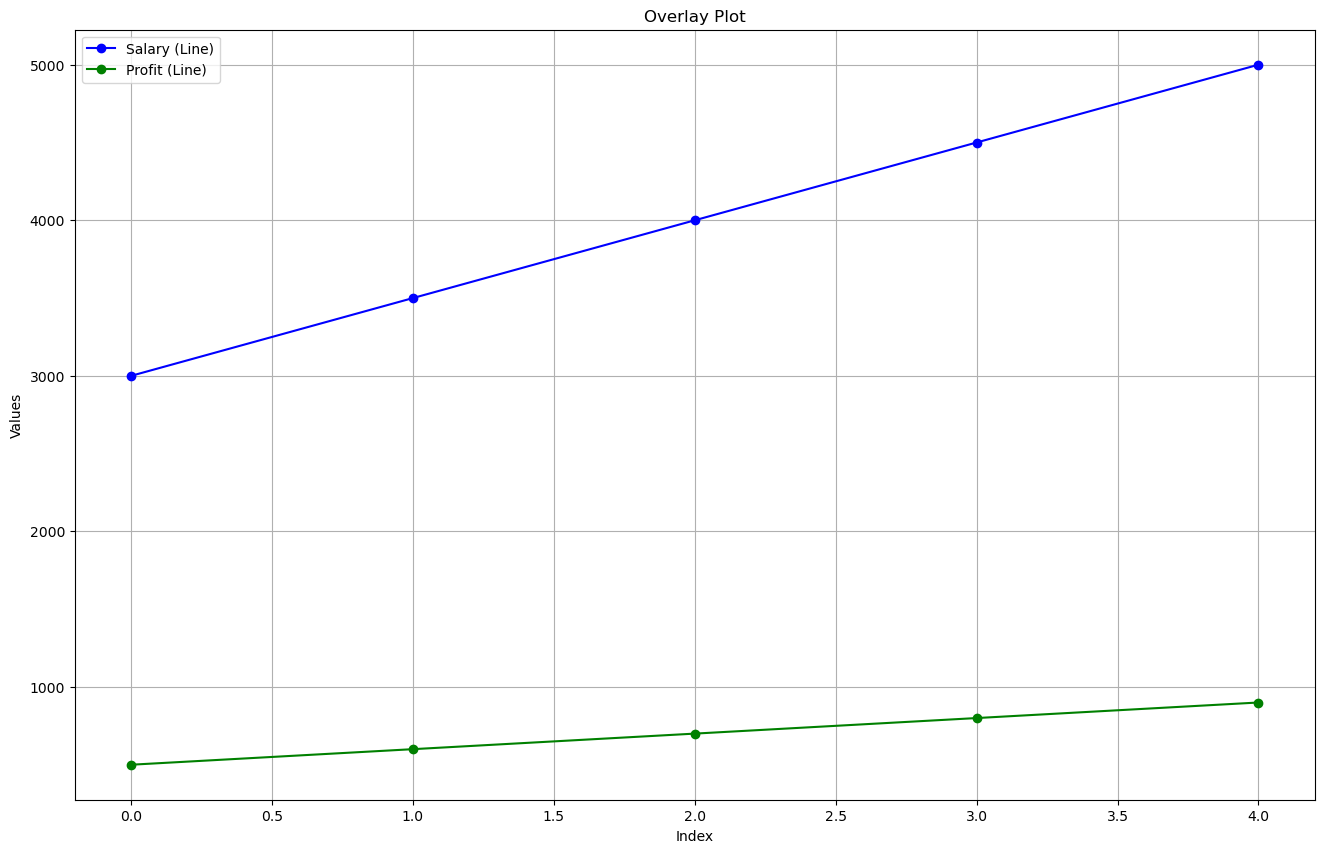

In [31]:

# Overlay plots
plot_overlay(data, columns=['Salary', 'Profit'], plot_types=['line', 'line'])


